1. 引入模块，读取数据
2. 构建计算图（构建网络模型）
3. 损失函数与优化器
4. 开始训练模型
5. 对训练的模型预测结果进行评估

In [137]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [151]:
import sklearn.datasets
X,y = sklearn.datasets.make_moons(200,noise=0.4)
# print(X,y)

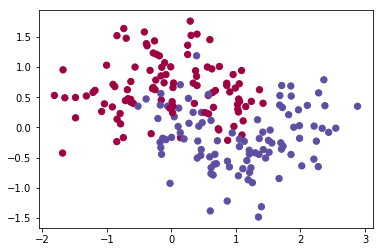

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.show()

In [153]:
# 多层感知机网络构建
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

In [154]:
class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier,self).__init__()
        self.fc1 = nn.Linear(2,4)
        self.fc2 = nn.Linear(4,6)
        self.fc3 = nn.Linear(6,3)
        self.fc4 = nn.Linear(3,2)
    def forward(self,x):
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        x = F.tanh(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return x
    def predict(self,x):
        pred = F.sigmoid(self.forward(x))
        ans = []
        for i in pred:
            if i[0]>i[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [155]:
model = MyClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [156]:
epoches = 20000
losses = []
for i in range(epoches):
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%2000==0:
        print(losses[i])

C:\Users\Mying\Anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


0.6774818301200867
0.1605897694826126
0.14139674603939056
0.12871144711971283
0.1005646139383316
0.09922792762517929
0.09885039180517197
0.09817853569984436
0.09688468277454376
0.09523515403270721


In [157]:
print(min(losses))

0.0927254930138588


In [158]:
print(losses[-10:])

[0.09273345023393631, 0.09273252636194229, 0.09273161739110947, 0.09273082762956619, 0.092729851603508, 0.09272906184196472, 0.09272811561822891, 0.09272733330726624, 0.09272636473178864, 0.0927254930138588]


In [159]:
from sklearn.metrics import accuracy_score
import numpy as np
print('模型准确率为：',accuracy_score(model.predict(X),y))

模型准确率为： 0.95


C:\Users\Mying\Anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\Mying\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [160]:
def pred(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()


In [161]:
def plot_decision_bondary(pred_func,X,y):
    x_min,x_max = X[:,0].min()-0.5,X[:,0].max()+0.5
    y_min,y_max = X[:,1].min()-0.5,X[:,1].max()+0.5
    h = 0.01
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    Z = pred_func(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx,yy,Z,cmap = plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap = plt.cm.Spectral)

C:\Users\Mying\Anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\Mying\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


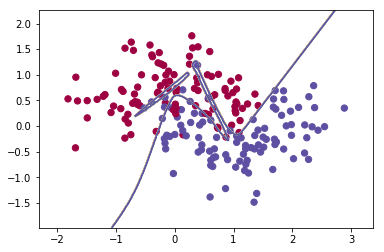

In [162]:
plot_decision_bondary(lambda x:pred(x),X.numpy(),y.numpy())

In [ ]:
# 有点过拟合的感觉呀